## Drifter Velocity Period Notebook

### Introduction
This notebook focuses on the computation of the oscillation period of drifters' velocity

### Data Sources
- Drifter Data:
  - Source: NOAA
  - Collection Frequency: Every 6 hours
  - Total Number of Drifters: 221

## Import Library

In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
from cartopy import config
import matplotlib.animation

## Read Drifter Data

In [2]:
fn='./drifter_6hour_qc_893c_d15d_c4b7_U1711967648742.nc';
ds=xr.open_dataset(fn);
ds

<xarray.Dataset>
Dimensions:    (row: 78383)
Dimensions without coordinates: row
Data variables:
    time       (row) datetime64[ns] ...
    latitude   (row) float64 ...
    longitude  (row) float64 ...
    sst        (row) float64 ...
    ve         (row) float64 ...
    vn         (row) float64 ...
Attributes: (12/54)
    acknowledgement:            Lumpkin, Rick; Centurioni, Luca (2019). Globa...
    cdm_data_type:              Trajectory
    cdm_trajectory_variables:   ID
    comment:                    Global Drifter Program 6h data
    contributor_name:           NOAA Global Drifter Program
    contributor_role:           Data Acquisition Center
    ...                         ...
    summary:                    Global Drifter Program 6-hourly drifting buoy...
    time_coverage_end:          2023-10-14T18:00:00Z
    time_coverage_start:        2023-01-01T00:00:00Z
    title:                      Global Drifter Program - 6 Hour Interpolated ...
    Westernmost_Easting:        -70.0
    wmo_platform_code:          4600620

## Extract Coordinates and Variables

In [3]:
ve_curr = ds.ve.values
vn_curr = ds.vn.values
sst = ds.sst.values
lon = ds.longitude.values
lat = ds.latitude.values
time = ds.time.values

## Creation of Pandas Array for Drifter Data

In [4]:
data = {
    'Longitude': lon,
    'Latitude' : lat,
    'time'     : time,
    've'       : ve_curr,
    'vn'       : vn_curr,
    'sst'      : sst
}

df = pd.DataFrame(data)
df

,Longitude,Latitude,time,ve,vn,sst
0,-14.478,-18.548,2023-01-01 00:00:00,-0.13760,-0.07635,23.612
1,-14.499,-18.556,2023-01-01 06:00:00,-0.09969,0.01322,23.564
2,-14.519,-18.543,2023-01-01 12:00:00,-0.15719,0.08193,23.699
3,-14.563,-18.524,2023-01-01 18:00:00,-0.26155,0.03533,23.856
4,-14.626,-18.529,2023-01-02 00:00:00,-0.23922,-0.07837,23.717
...,...,...,...,...,...,...
78378,-22.006,-19.946,2023-06-11 12:00:00,-0.03853,-0.05076,25.189
78379,-22.013,-19.961,2023-06-11 18:00:00,-0.05150,-0.06262,25.179
78380,-22.027,-19.971,2023-06-12 00:00:00,-0.06030,-0.04773,25.133
78381,-22.038,-19.980,2023-06-12 06:00:00,-0.06036,-0.05688,25.093


## Selecting Drifter Data

In [5]:
# Test: Our selected drifter has 1102 observations. 
df_1 = df[0:158] 
df_1

,Longitude,Latitude,time,ve,vn,sst
0,-14.478,-18.548,2023-01-01 00:00:00,-0.13760,-0.07635,23.612
1,-14.499,-18.556,2023-01-01 06:00:00,-0.09969,0.01322,23.564
2,-14.519,-18.543,2023-01-01 12:00:00,-0.15719,0.08193,23.699
3,-14.563,-18.524,2023-01-01 18:00:00,-0.26155,0.03533,23.856
4,-14.626,-18.529,2023-01-02 00:00:00,-0.23922,-0.07837,23.717
...,...,...,...,...,...,...
153,-17.671,-18.700,2023-02-08 06:00:00,-0.11487,-0.00411,25.657
154,-17.695,-18.704,2023-02-08 12:00:00,-0.09986,-0.02095,25.741
155,-17.711,-18.708,2023-02-08 18:00:00,-0.02361,0.00256,25.866
156,-17.705,-18.703,2023-02-09 00:00:00,-0.01014,0.08457,25.758


## Let's plot the trajectory of our drifter



## Case of ve

C:\Users\PC-M2OA\AppData\Local\Temp\ipykernel_16056\2578930775.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['time'] = (df_1['time'] - df_1['time'].iloc[0]).dt.total_seconds()


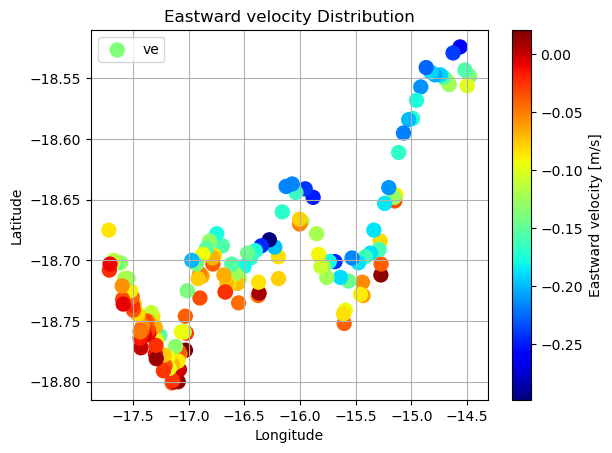

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame with longitude, latitude, temperature, and time
# Replace this with your actual DataFrame
df_1 = df[0:158]

# Convertir la colonne temps en un format numérique représentant le temps écoulé (en secondes)
df_1['time'] = (df_1['time'] - df_1['time'].iloc[0]).dt.total_seconds()

# Tracer la force inertielle en 2D
plt.scatter(df_1['Longitude'], df_1['Latitude'], c=df_1['ve'], cmap='jet', s=100)
 
plt.colorbar(label='Eastward velocity [m/s]')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Eastward velocity Distribution')
# Add grid
plt.grid(True)
plt.legend(['ve'])
plt.savefig("fig19 mode.png")
plt.show()

## Case of vn

C:\Users\PC-M2OA\AppData\Local\Temp\ipykernel_16056\2045285560.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['time'] = (df_1['time'] - df_1['time'].iloc[0]).dt.total_seconds()


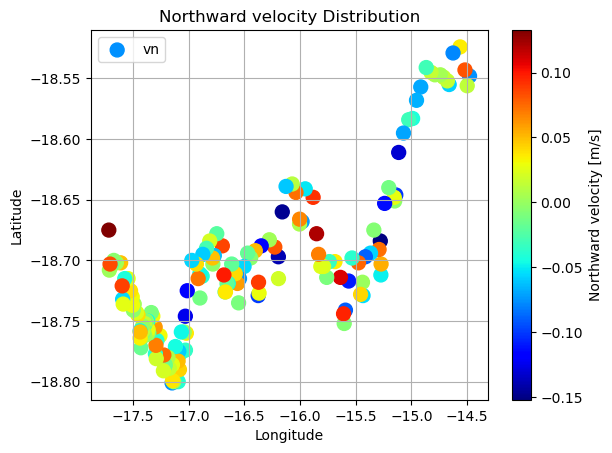

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame with longitude, latitude, temperature, and time
# Replace this with your actual DataFrame
df_1 = df[0:158]

# Convertir la colonne temps en un format numérique représentant le temps écoulé (en secondes)
df_1['time'] = (df_1['time'] - df_1['time'].iloc[0]).dt.total_seconds()

# Tracer la force inertielle en 2D
plt.scatter(df_1['Longitude'], df_1['Latitude'], c=df_1['vn'], cmap='jet', s=100)
 
plt.colorbar(label='Northward velocity [m/s]')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Northward velocity Distribution')
# Add grid
plt.grid(True)
plt.legend(['vn'])
plt.savefig("fig20 mode.png")
plt.show()

## Time Series of Eastward (ve) and Northward (vn) Velocity for Our Drifter 

## Case of ve

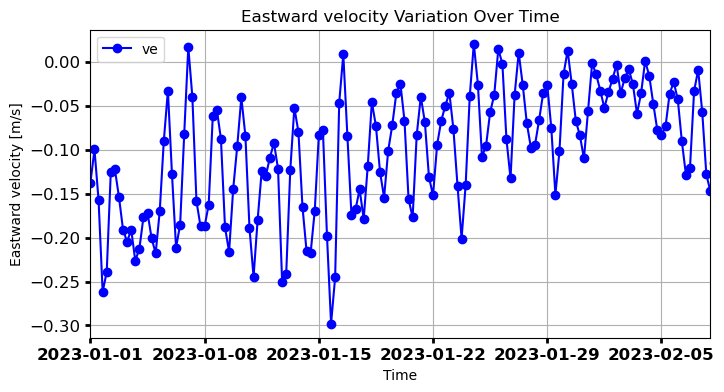

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with 'time' and 've' columns
df_1 = df[0:158]
# Step 1: Plotting
plt.figure(figsize=(8, 4))

# Plot ve as a function of time
plt.plot(df_1['time'], df_1['ve'], color='b', marker='o', linestyle='-')

# Add axis labels and title
plt.legend(['ve'])
plt.xlabel('Time')
plt.ylabel('Eastward velocity [m/s]')
plt.title('Eastward velocity Variation Over Time')

# Add grid
plt.grid(True)

# Set font size and font weight directly on the Axes object
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=12, width=2)
for label in ax.get_xticklabels():
    label.set_fontweight('bold')

# Set x-axis limits and tick labels
ax.set_xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2023-02-08'))
ax.set_xticks(pd.date_range(start='2023-01-01', end='2023-02-08', freq='168H'))
ax.set_xticklabels(pd.date_range(start='2023-01-01', end='2023-02-08', freq='168H').strftime('%Y-%m-%d'), rotation=0)

# plt.fill_between([start_date, end_date], ymin, ymax, color='green', alpha=0.3)
plt.savefig("fig21 mode.png")
plt.show()

## Case of vn

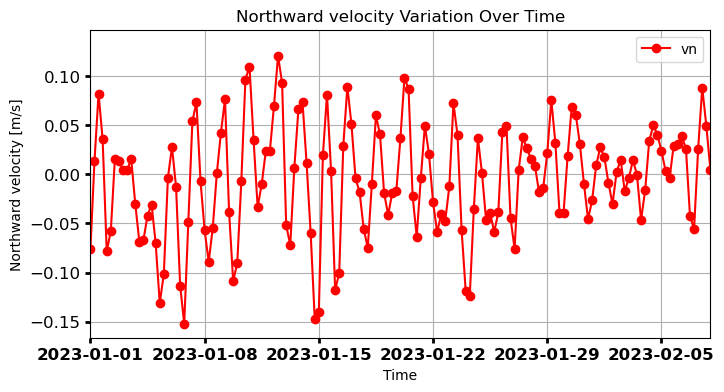

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with 'time' and 've' columns
df_1 = df[0:158]
# Step 1: Plotting
plt.figure(figsize=(8, 4))

# Plot ve as a function of time
plt.plot(df_1['time'], df_1['vn'], color='red', marker='o', linestyle='-')

# Add axis labels and title
plt.legend(['vn'])
plt.xlabel('Time')
plt.ylabel('Northward velocity [m/s]')
plt.title('Northward velocity Variation Over Time')

# Add grid
plt.grid(True)

# Set font size and font weight directly on the Axes object
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=12, width=2)
for label in ax.get_xticklabels():
    label.set_fontweight('bold')

# Set x-axis limits and tick labels
ax.set_xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2023-02-08'))
ax.set_xticks(pd.date_range(start='2023-01-01', end='2023-02-08', freq='168H'))
ax.set_xticklabels(pd.date_range(start='2023-01-01', end='2023-02-08', freq='168H').strftime('%Y-%m-%d'), rotation=0)

# plt.fill_between([start_date, end_date], ymin, ymax, color='green', alpha=0.3)
plt.savefig("fig22 mode.png")
plt.show()

## Conclusion

- By observing the time series of $v_n$, we notice that it records 4 oscillations per week, while $v_e$ records $\frac{13}{4}$ oscillations, resulting in a period of 42 hours for $v_n$ and 51.69 hours for $v_e$.
- Knowing that frequency is equal to the inverse of the period, for both $v_e$ and $v_n$, we obtain frequencies with orders of magnitude of $10^{-6}$.
- Thus, the frequency for $v_n$ is $6.614 \times 10^{-6}$, and for $v_e$ is $5.374 \times 10^{-6}$.

## We will detrend time series using mirror effect at the boundaries

## Case of ve

In [11]:
# Making them periodic at the boundaries.
# Convert your numpy array into pandas DataFrame if not already done
df_1 =  df[0:158]

# Step 1: Trend Detection
df_1['trend'] = df_1['ve'].rolling(window=12).mean()

# Step 2: Removing Seasonal Components
df_1['detrended'] = df_1['ve'] - df_1['trend']

# Step 3: Applying Mirror Effect at Boundaries
# Duplicate data by reversing time
df_1_mirror = df_1.copy()
df_1_mirror['time'] = df_1_mirror['time'].apply(lambda x: x - (x - df_1['time'].min()) * 2)

# Concatenate original DataFrame and its mirror
df_1_extended = pd.concat([df_1, df_1_mirror], ignore_index=True)

# Sort by time
df_1_extended.sort_values(by='time', inplace=True)

# Step 4: Interpolation or Extrapolation (not implemented here)

# Step 5: Validation (not implemented here)

# Displaying extended data with mirror effect
print(df_1_extended)

     Longitude  Latitude                time       ve       vn     sst  \
315    -17.716   -18.675 2022-11-22 18:00:00 -0.08568  0.13274  25.721   
314    -17.705   -18.703 2022-11-23 00:00:00 -0.01014  0.08457  25.758   
313    -17.711   -18.708 2022-11-23 06:00:00 -0.02361  0.00256  25.866   
312    -17.695   -18.704 2022-11-23 12:00:00 -0.09986 -0.02095  25.741   
311    -17.671   -18.700 2022-11-23 18:00:00 -0.11487 -0.00411  25.657   
..         ...       ...                 ...      ...      ...     ...   
153    -17.671   -18.700 2023-02-08 06:00:00 -0.11487 -0.00411  25.657   
154    -17.695   -18.704 2023-02-08 12:00:00 -0.09986 -0.02095  25.741   
155    -17.711   -18.708 2023-02-08 18:00:00 -0.02361  0.00256  25.866   
156    -17.705   -18.703 2023-02-09 00:00:00 -0.01014  0.08457  25.758   
157    -17.716   -18.675 2023-02-09 06:00:00 -0.08568  0.13274  25.721   

        trend  detrended  
315 -0.079825  -0.005855  
314 -0.080223   0.070083  
313 -0.082923   0.059313  
312

C:\Users\PC-M2OA\AppData\Local\Temp\ipykernel_16056\3779113813.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['trend'] = df_1['ve'].rolling(window=12).mean()
C:\Users\PC-M2OA\AppData\Local\Temp\ipykernel_16056\3779113813.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['detrended'] = df_1['ve'] - df_1['trend']


## Case of vn

In [12]:
# Making them periodic at the boundaries.
# Convert your numpy array into pandas DataFrame if not already done
df_2 =  df[0:158]

# Step 1: Trend Detection
df_2['trend'] = df_2['vn'].rolling(window=12).mean()

# Step 2: Removing Seasonal Components
df_2['detrended'] = df_2['vn'] - df_2['trend']

# Step 3: Applying Mirror Effect at Boundaries
# Duplicate data by reversing time
df_2_mirror = df_2.copy()
df_2_mirror['time'] = df_2_mirror['time'].apply(lambda x: x - (x - df_2['time'].min()) * 2)

# Concatenate original DataFrame and its mirror
df_2_extended = pd.concat([df_2, df_2_mirror], ignore_index=True)

# Sort by time
df_2_extended.sort_values(by='time', inplace=True)

# Step 4: Interpolation or Extrapolation (not implemented here)

# Step 5: Validation (not implemented here)

# Displaying extended data with mirror effect
print(df_2_extended)

     Longitude  Latitude                time       ve       vn     sst  \
315    -17.716   -18.675 2022-11-22 18:00:00 -0.08568  0.13274  25.721   
314    -17.705   -18.703 2022-11-23 00:00:00 -0.01014  0.08457  25.758   
313    -17.711   -18.708 2022-11-23 06:00:00 -0.02361  0.00256  25.866   
312    -17.695   -18.704 2022-11-23 12:00:00 -0.09986 -0.02095  25.741   
311    -17.671   -18.700 2022-11-23 18:00:00 -0.11487 -0.00411  25.657   
..         ...       ...                 ...      ...      ...     ...   
153    -17.671   -18.700 2023-02-08 06:00:00 -0.11487 -0.00411  25.657   
154    -17.695   -18.704 2023-02-08 12:00:00 -0.09986 -0.02095  25.741   
155    -17.711   -18.708 2023-02-08 18:00:00 -0.02361  0.00256  25.866   
156    -17.705   -18.703 2023-02-09 00:00:00 -0.01014  0.08457  25.758   
157    -17.716   -18.675 2023-02-09 06:00:00 -0.08568  0.13274  25.721   

        trend  detrended  
315  0.024245   0.108495  
314  0.016387   0.068183  
313  0.011942  -0.009382  
312

C:\Users\PC-M2OA\AppData\Local\Temp\ipykernel_16056\2265515148.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['trend'] = df_2['vn'].rolling(window=12).mean()
C:\Users\PC-M2OA\AppData\Local\Temp\ipykernel_16056\2265515148.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['detrended'] = df_2['vn'] - df_2['trend']


## Calculation of the period and visualization of the frequency spectrum

## Vase of ve

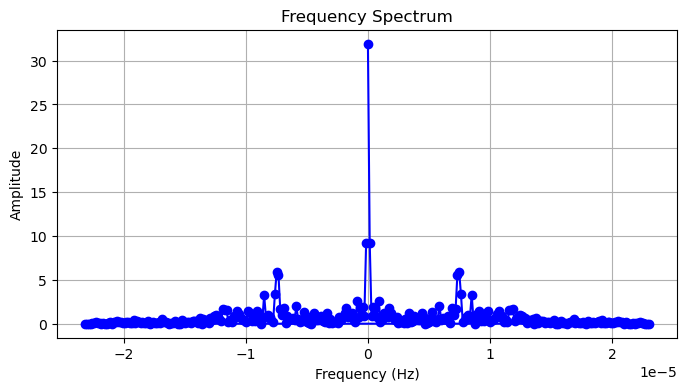

Period of the time series: inf time units


In [13]:
# Suppose 'df_extended' is your DataFrame containing the extended time series data with mirror effect
# 'time' is the column representing time and 've' is the column representing velocities

# Calculating the Fourier transform
N = len(df_1_extended)
dt = (df_1_extended['time'].iloc[1] - df_1_extended['time'].iloc[0]).total_seconds()  # Convert to seconds
velocity_fft = np.fft.fft(df_1_extended['ve'])
freq = np.fft.fftfreq(N, dt)  # Corresponding frequencies

# Identifying the dominant frequency (which corresponds to the period)
index_max = np.argmax(np.abs(velocity_fft))

# Checking if the dominant frequency is not zero
if freq[index_max] != 0:
    period = 1 / np.abs(freq[index_max])
else:
    period = np.inf  # If the dominant frequency is zero, consider the period as infinite

# Displaying the frequency spectrum
plt.figure(figsize=(8, 4))
plt.plot(freq, np.abs(velocity_fft), color='blue', marker='o', linestyle='-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum')
plt.grid(True)
plt.savefig("fig23 mode.png")
plt.show()

print("Period of the time series: {:.2f} time units".format(period))

## Case of vn

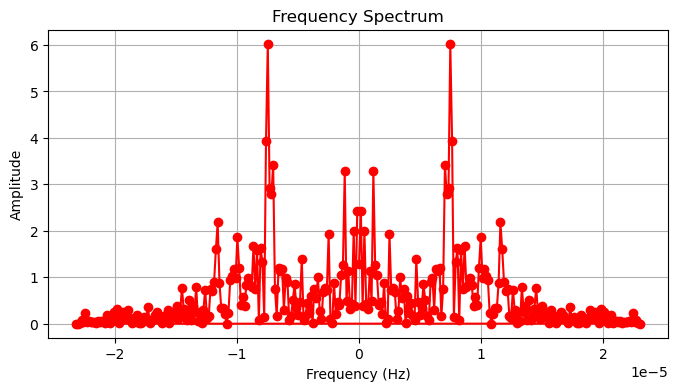

Period of the time series: 133835.29 time units


In [14]:
# Suppose 'df_extended' is your DataFrame containing the extended time series data with mirror effect
# 'time' is the column representing time and 'vn' is the column representing velocities

# Calculating the Fourier transform
N = len(df_2_extended)
dt = (df_2_extended['time'].iloc[1] - df_2_extended['time'].iloc[0]).total_seconds()  # Convert to seconds
velocity_fft = np.fft.fft(df_2_extended['vn'])
freq = np.fft.fftfreq(N, dt)  # Corresponding frequencies

# Identifying the dominant frequency (which corresponds to the period)
index_max = np.argmax(np.abs(velocity_fft))

# Checking if the dominant frequency is not zero
if freq[index_max] != 0:
    period = 1 / np.abs(freq[index_max])
else:
    period = np.inf  # If the dominant frequency is zero, consider the period as infinite

# Displaying the frequency spectrum
plt.figure(figsize=(8, 4))
plt.plot(freq, np.abs(velocity_fft), color='red', marker='o', linestyle='-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum')
plt.grid(True)
plt.savefig("fig24 mode.png")
plt.show()

print("Period of the time series: {:.2f} time units".format(period))

## Conclusion

- By applying the mirror effect, we obtain a frequency of $0$ for $v_e$ and $7.472 \times 10^{-6}$ for $v_n$.

## Comparison between Analytically Obtained Frequencies and those Obtained by Mirror Effect

- Comparing the frequencies of the two velocities, we observe that the frequencies of $v_n$ obtained analytically are very close to those obtained by the mirror effect, while those of $v_e$ are very diff
- $vn$ est d'ordre $10e-6$ qui correspond à l'ordre de grandeur de la force de coriolis. Ce qui prouve par conséquent que les oscillations de $vn$ inertielles et peux pour $ve$ aussi.
- In the following cells, we will attempt to highlight the inertial forces resulting from \( v_e \) and \( v_n \).erent.

#  Case of ve

C:\Users\PC-M2OA\AppData\Local\Temp\ipykernel_16056\3771906637.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['time'] = (df_1['time'] - df_1['time'].iloc[0]).dt.total_seconds()
C:\Users\PC-M2OA\AppData\Local\Temp\ipykernel_16056\3771906637.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['acceleration'] = df_1['ve'].diff() / df_1['time'].diff()
C:\Users\PC-M2OA\AppData\Local\Temp\ipykernel_16056\3771906637.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

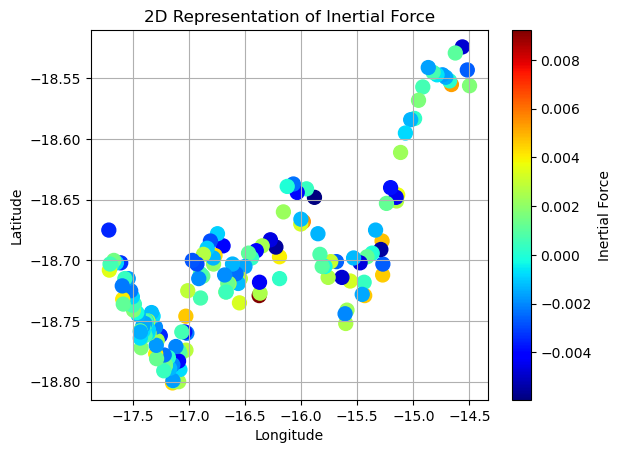

In [15]:
# Creating an example dataframe
df_1 = df[0:158]

# Convert the time column to a numerical format representing elapsed time (in seconds)
df_1['time'] = (df_1['time'] - df_1['time'].iloc[0]).dt.total_seconds()

# Calculating acceleration
df_1['acceleration'] = df_1['ve'].diff() / df_1['time'].diff()

# Mass (as an example)
mass = 1000  # in kg

# Calculating inertial force
df_1['inertial_force'] = mass * df_1['acceleration']

# Plotting the inertial force in 2D
plt.scatter(df_1['Longitude'], df_1['Latitude'], c=df_1['inertial_force'], cmap='jet', s=100)
plt.colorbar(label='Inertial Force')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('2D Representation of Inertial Force')
plt.grid(True)
plt.savefig("fig25 mode.png")
plt.show()

#  Case of vn

C:\Users\PC-M2OA\AppData\Local\Temp\ipykernel_16056\603016207.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['time'] = (df_1['time'] - df_1['time'].iloc[0]).dt.total_seconds()
C:\Users\PC-M2OA\AppData\Local\Temp\ipykernel_16056\603016207.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['acceleration'] = df_1['vn'].diff() / df_1['time'].diff()
C:\Users\PC-M2OA\AppData\Local\Temp\ipykernel_16056\603016207.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

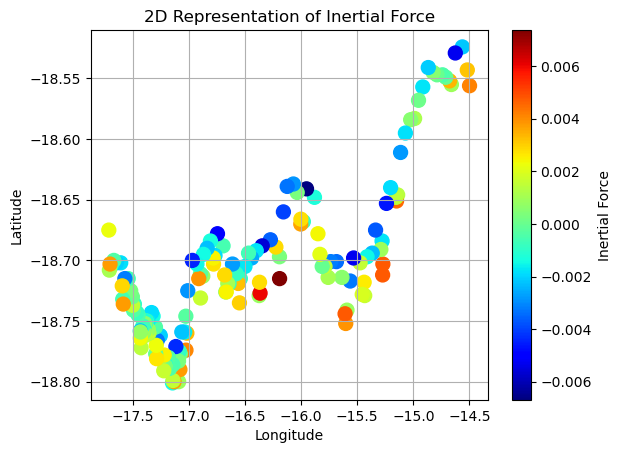

In [16]:
# Creating an example dataframe
df_1 = df[0:158]

# Convert the time column to a numerical format representing elapsed time (in seconds)
df_1['time'] = (df_1['time'] - df_1['time'].iloc[0]).dt.total_seconds()

# Calculating acceleration
df_1['acceleration'] = df_1['vn'].diff() / df_1['time'].diff()

# Mass (as an example)
mass = 1000  # in kg

# Calculating inertial force
df_1['inertial_force'] = mass * df_1['acceleration']

# Plotting the inertial force in 2D
plt.scatter(df_1['Longitude'], df_1['Latitude'], c=df_1['inertial_force'], cmap='jet', s=100)
plt.colorbar(label='Inertial Force')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('2D Representation of Inertial Force')
plt.grid(True)
plt.savefig("fig26 mode.png")
plt.show()